<a href="https://colab.research.google.com/github/werd0n4/hand-gesture-classification/blob/master/Skin_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import numpy as np
import cv2
import os
from glob import glob
from pathlib import Path
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [144]:
color_imgs_path = '/content/drive/My Drive/Colab Notebooks/skin_detector/zdjecia_kolorowe'
blackwhite_imgs_path = '/content/drive/My Drive/Colab Notebooks/skin_detector/zdjecia_czarnobiale'
skin_imgs_path =  '/content/drive/My Drive/Colab Notebooks/skin_detector/zdjecia_skora'
test_path = '/content/drive/My Drive/Colab Notebooks/skin_detector/zdjecia_testowe'

In [145]:
# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
# lower = np.array([0, 48, 80], dtype = "uint8")
# upper = np.array([20, 255, 255], dtype = "uint8")
# lower = np.array([0, 20, 60], dtype = "uint8")
# upper = np.array([20, 150, 255], dtype = "uint8")
lower = np.array([0, 38, 80], dtype = "uint8")#51
upper = np.array([45, 230, 255], dtype = "uint8")


# Skin detector

In [146]:
color_images = glob((f'{color_imgs_path}/*/*/*'))

for i, path in enumerate(color_images):
    #Create Train and Test dirs if not exists
    Path(skin_imgs_path+'/Train').mkdir(exist_ok=True)
    Path(skin_imgs_path+'/Test').mkdir(exist_ok=True)

    image = cv2.imread(path)
    converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    skinMask = cv2.inRange(converted, lower, upper)
    # skinMask = cv2.GaussianBlur(skinMask, (11, 11), 0)

    # plt.imshow(image)
    # plt.show()

    # apply a series of erosions and dilations to the mask
    # using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    skinMask = cv2.erode(skinMask, kernel, iterations = 2)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 2)

    # blur the mask to help remove noise, then apply the
    # mask to the frame
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
    skin = cv2.bitwise_and(image, image, mask = skinMask)

    #binary image
    # gray = cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)
    # binary = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]

    # cv2_imshow(np.hstack([image, skin]))
    # cv2_imshow(binary)

    #save image
    output_file_name = path.split('/')[9]
    output_path = path.split('/')[7:9]
    output_path = '/'.join(output_path)
    output_path = skin_imgs_path + '/' + output_path
    Path(output_path).mkdir(exist_ok=True)
    cv2.imwrite(output_path + '/' + output_file_name, skin)
    

    print("Progres: ", round(i/len(color_images), 2))

# Testing detector

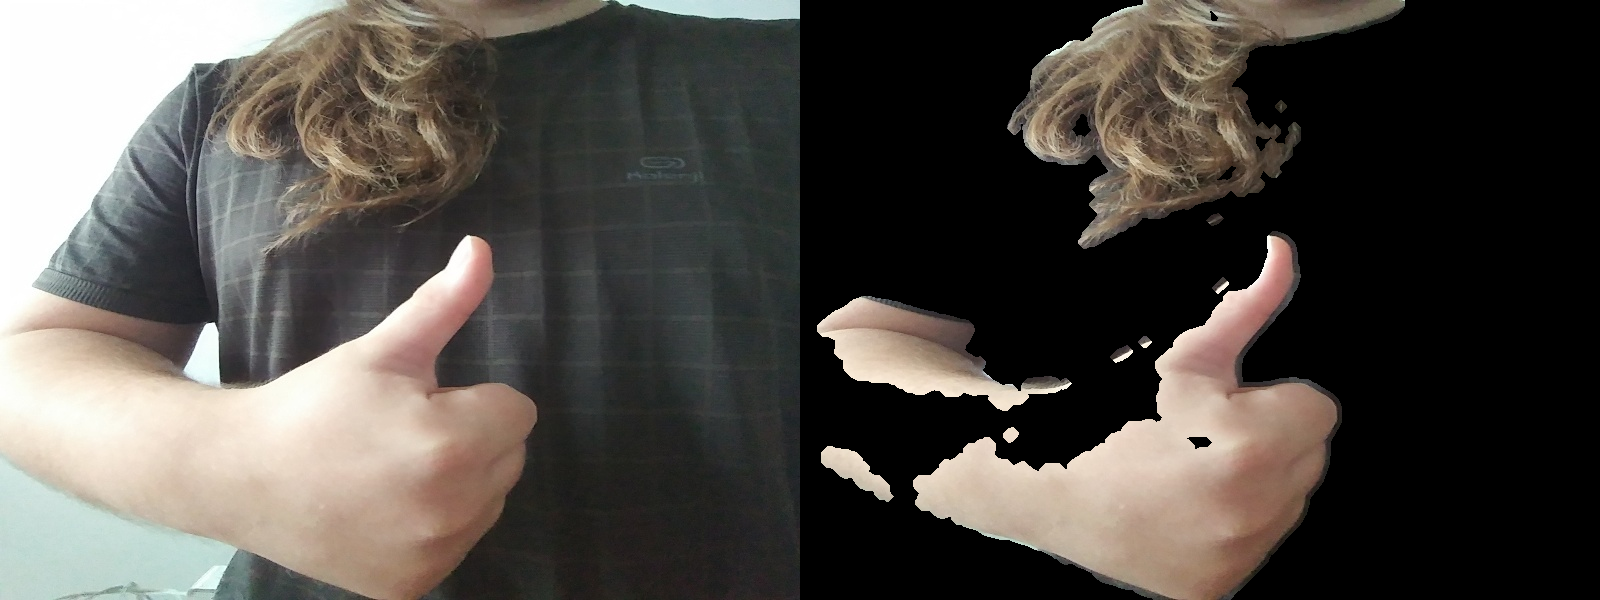

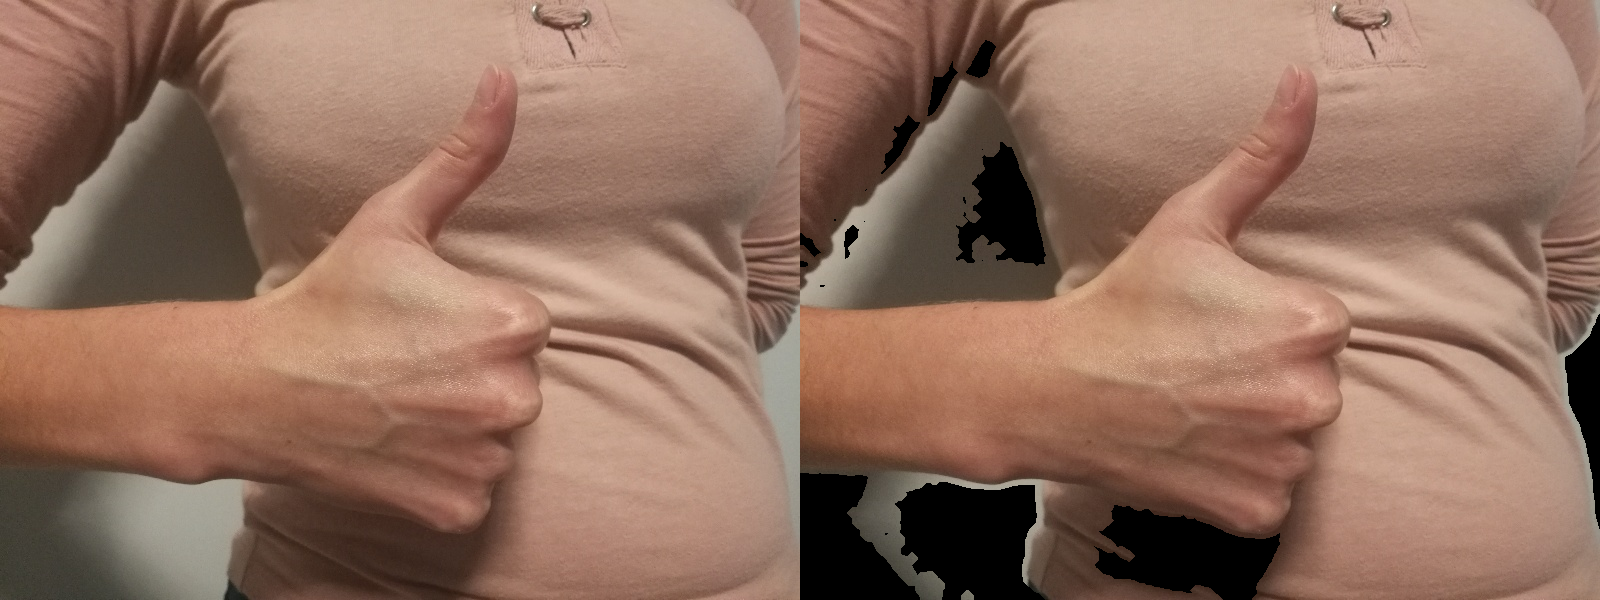

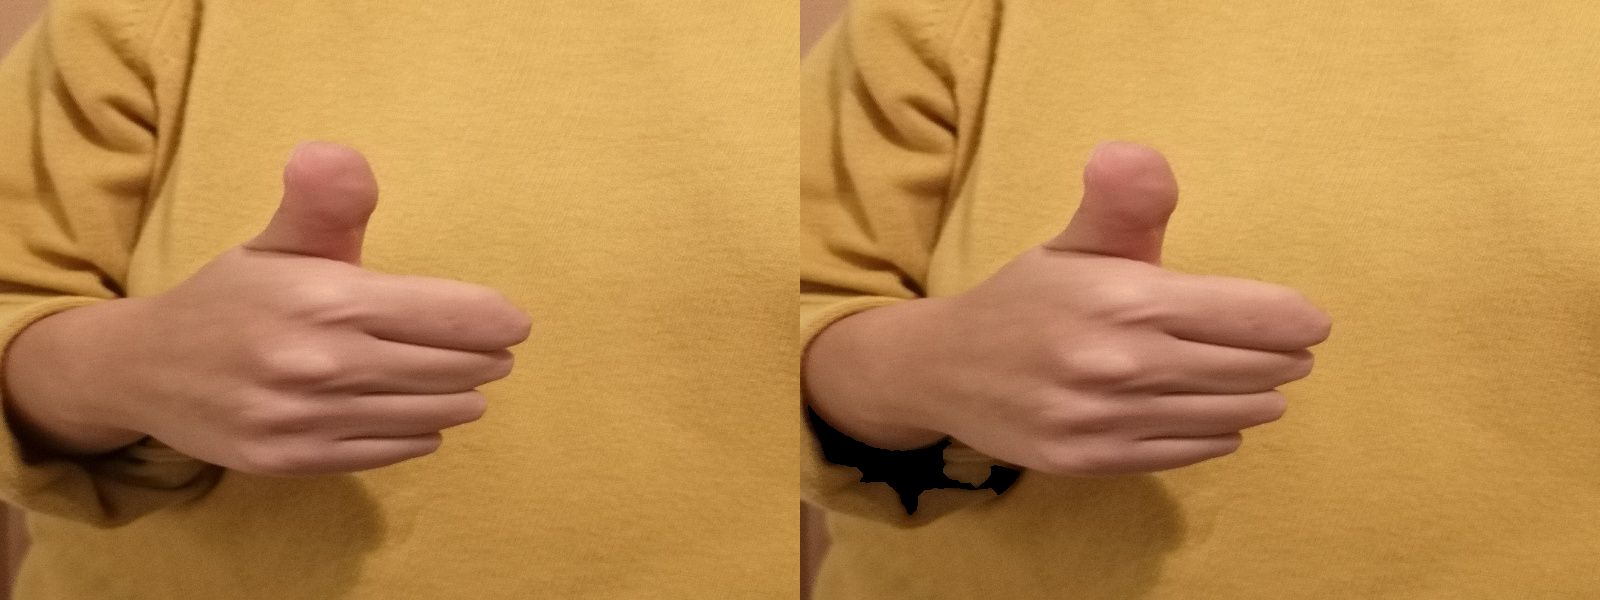

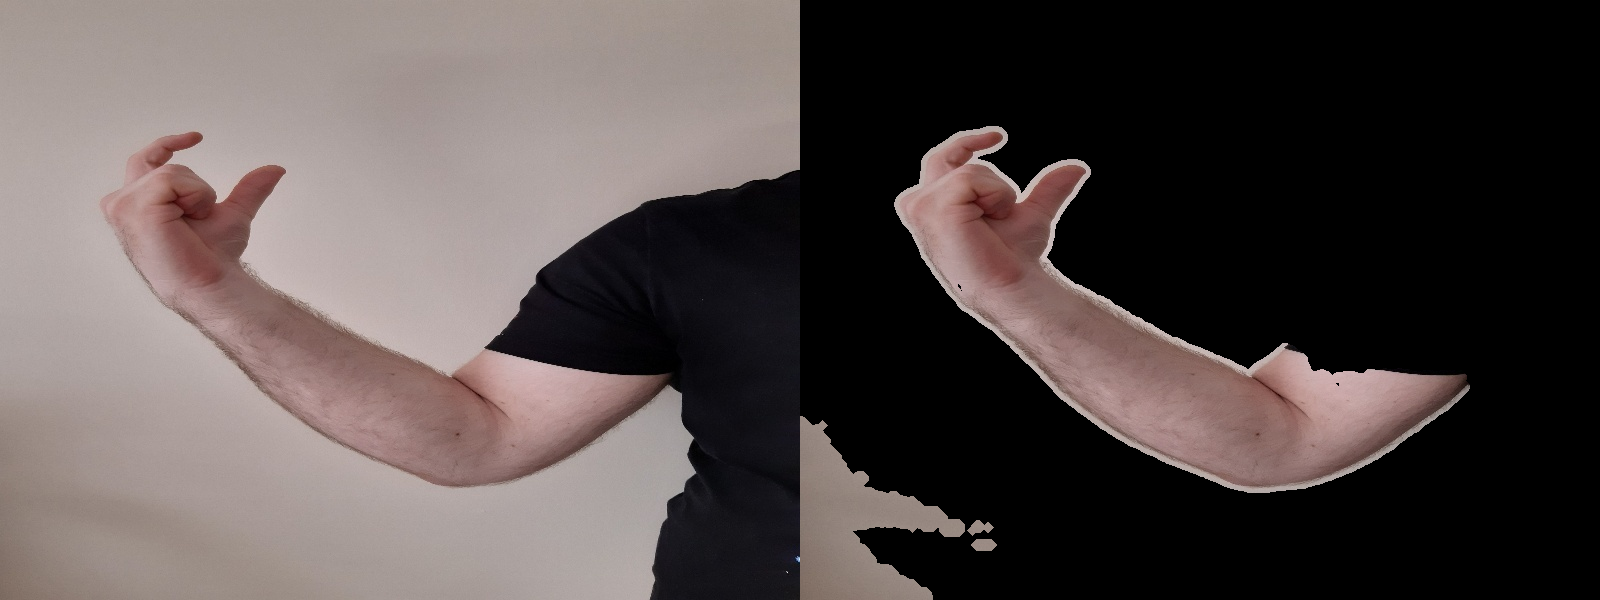

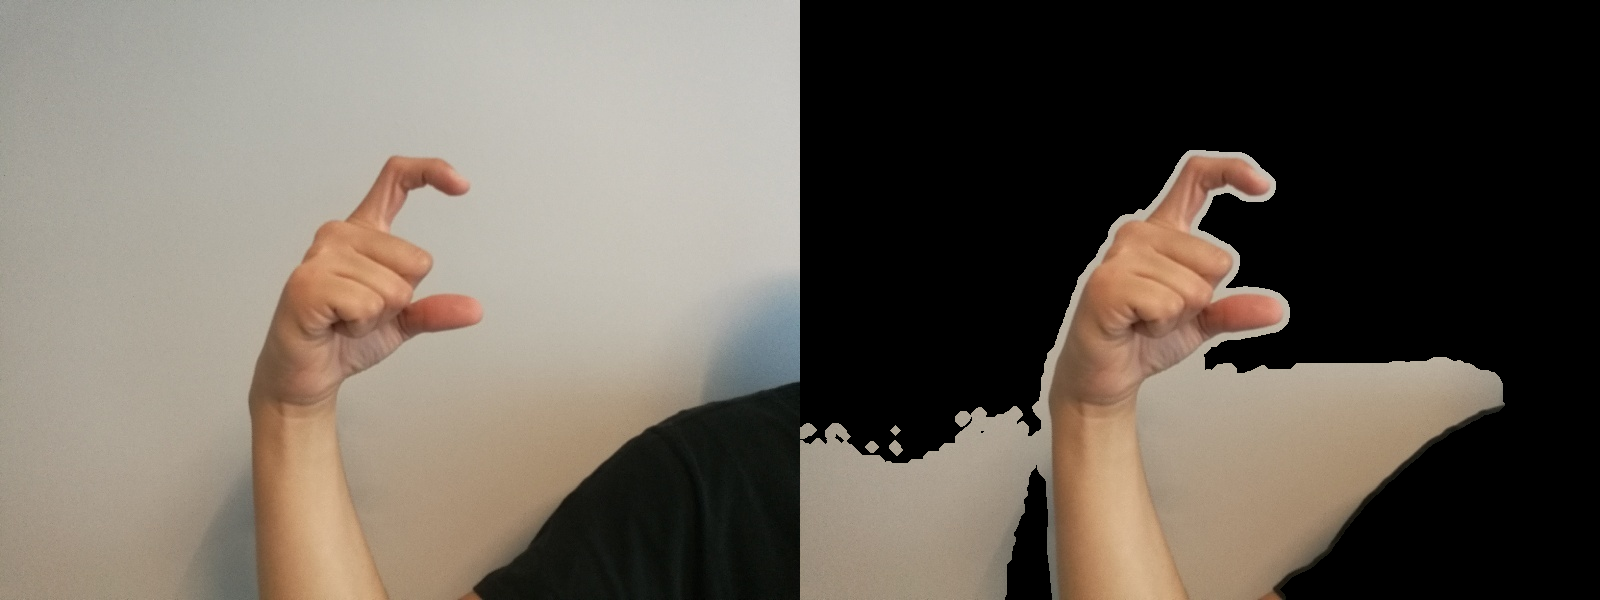

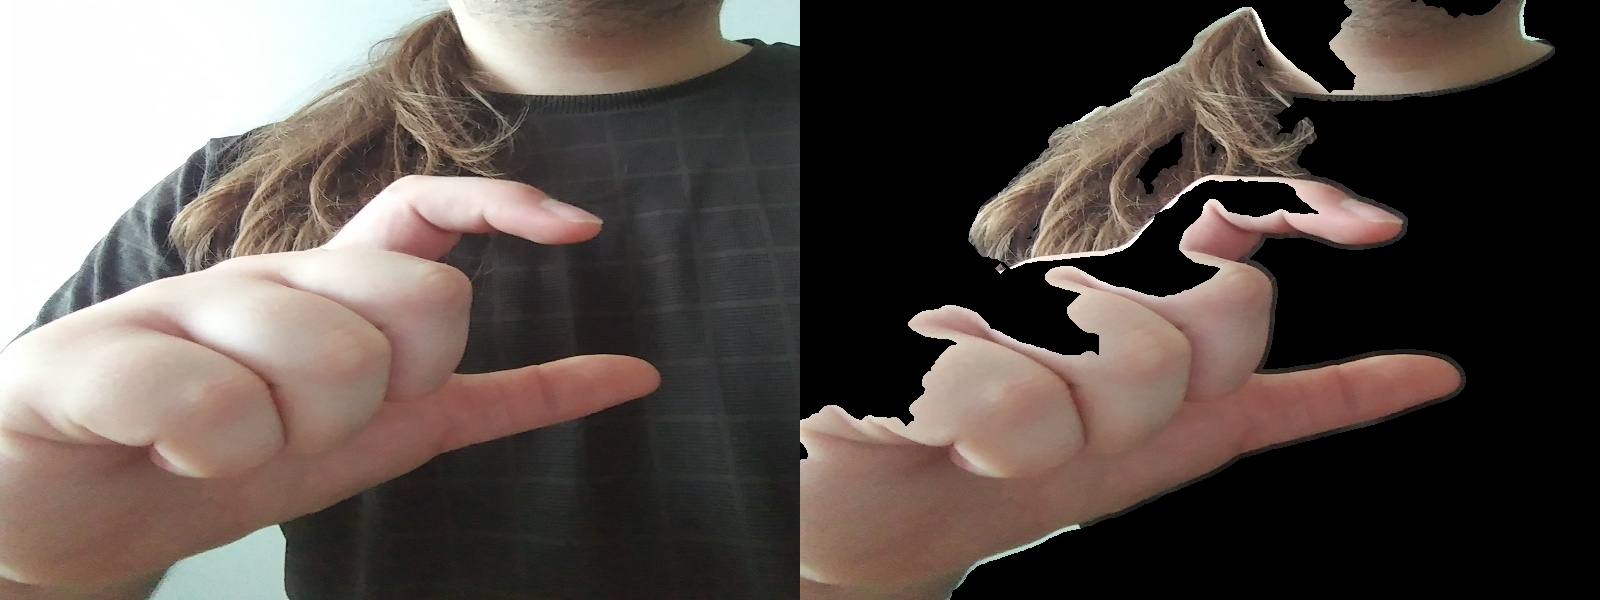

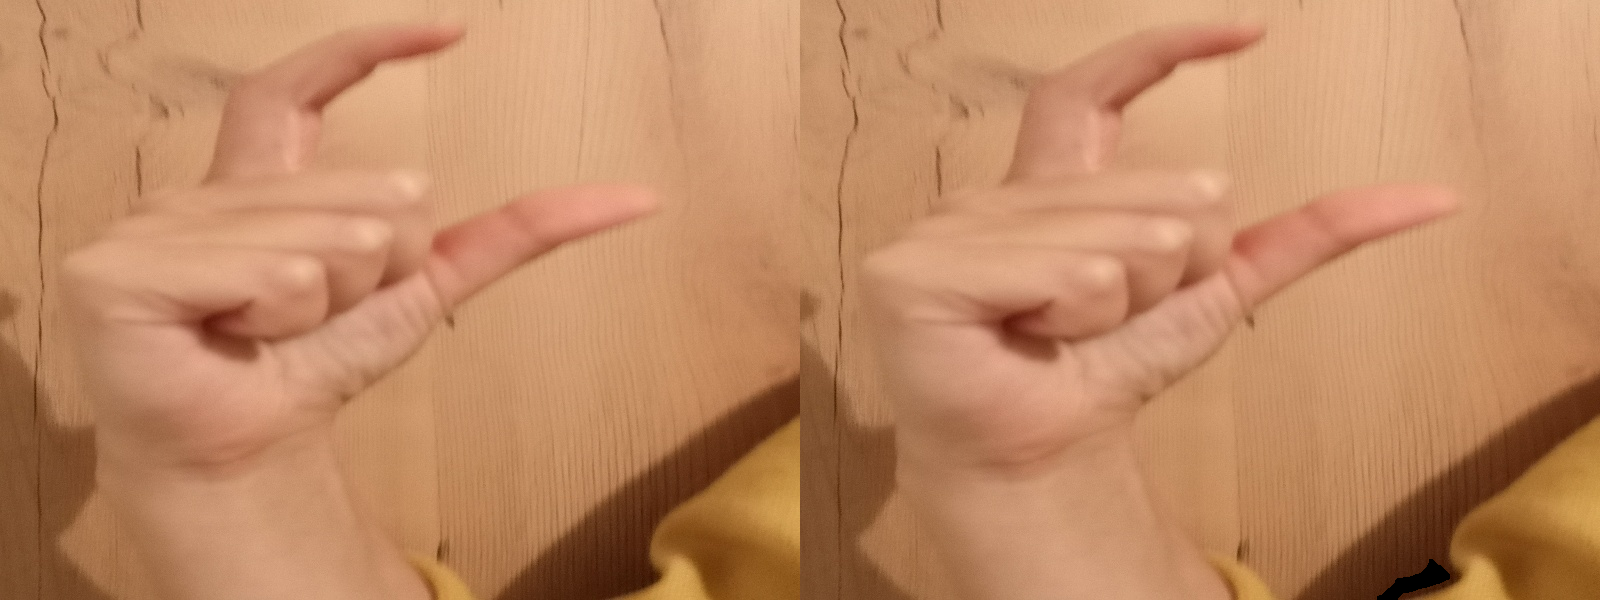

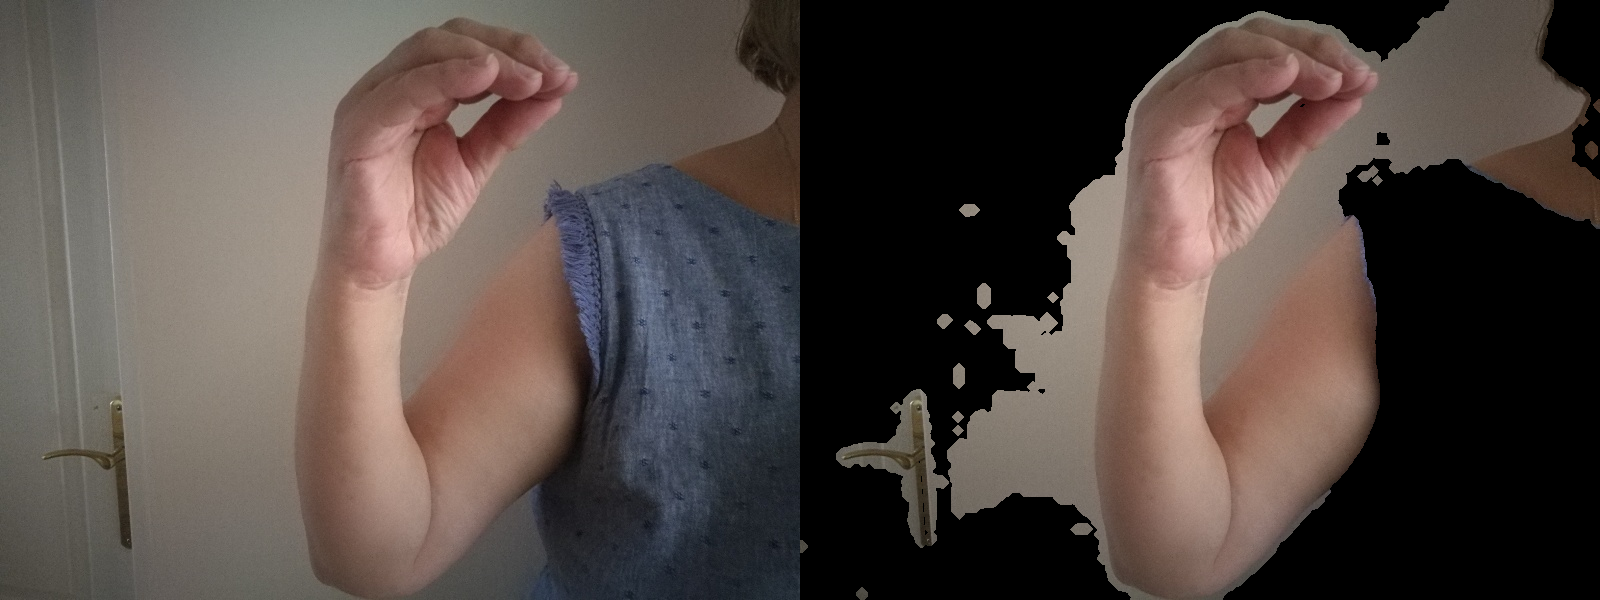

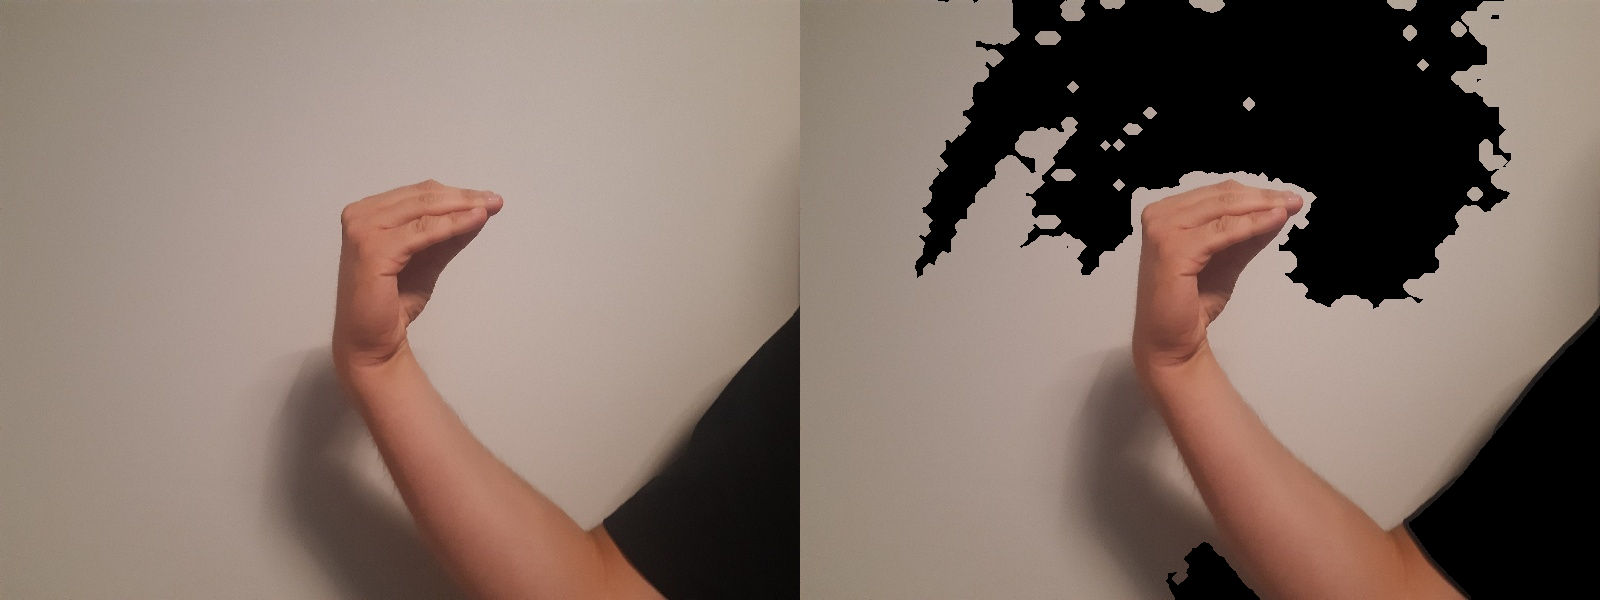

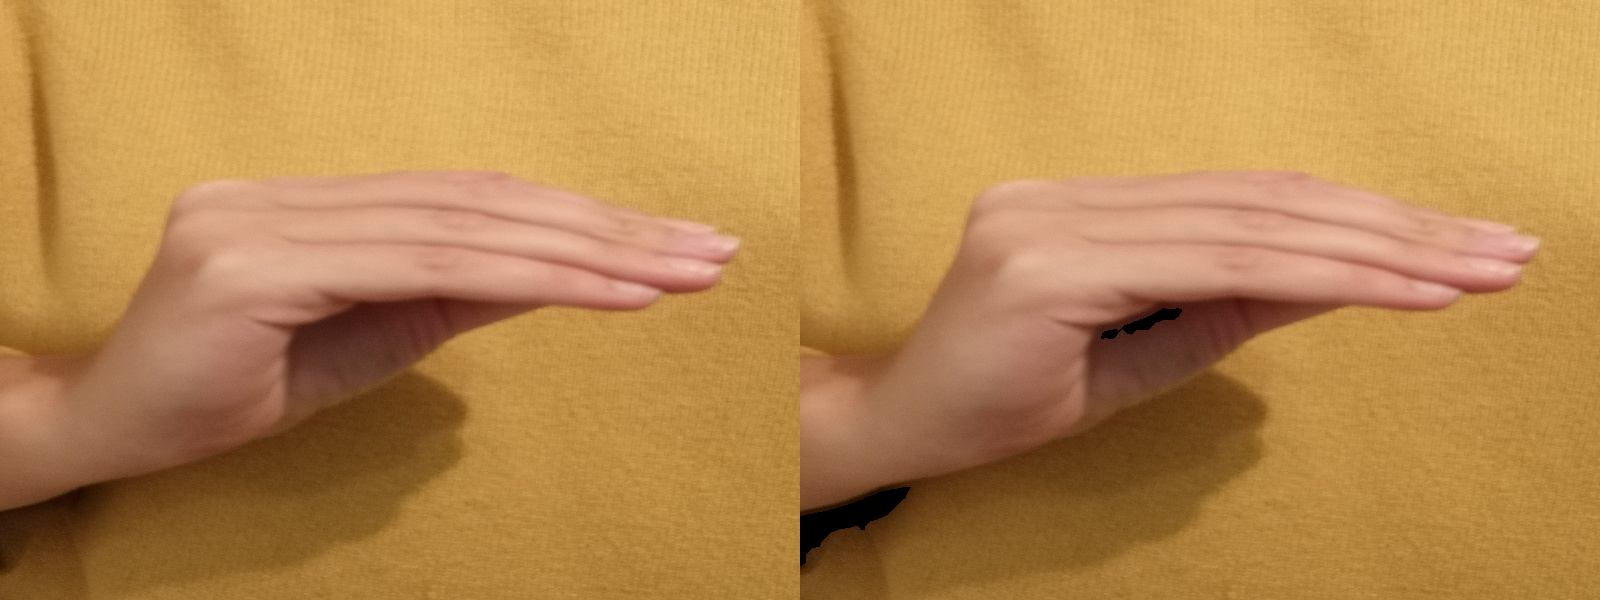

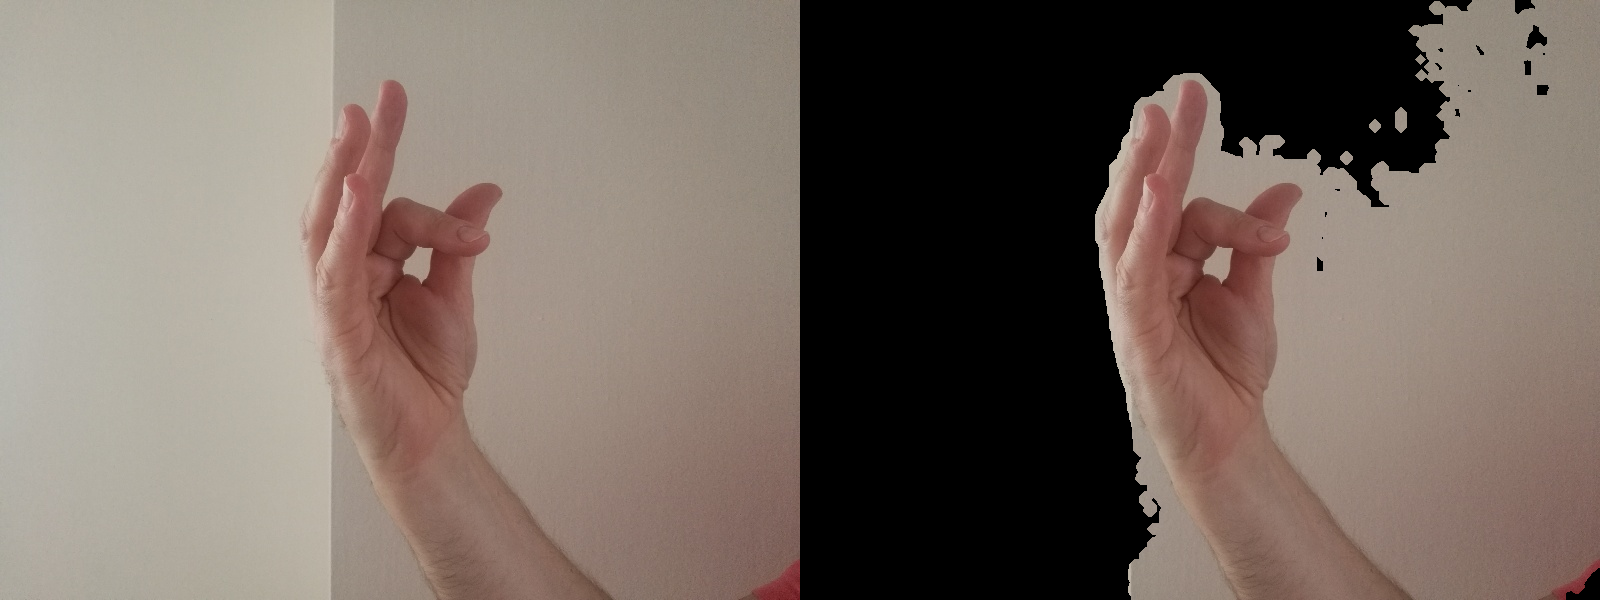

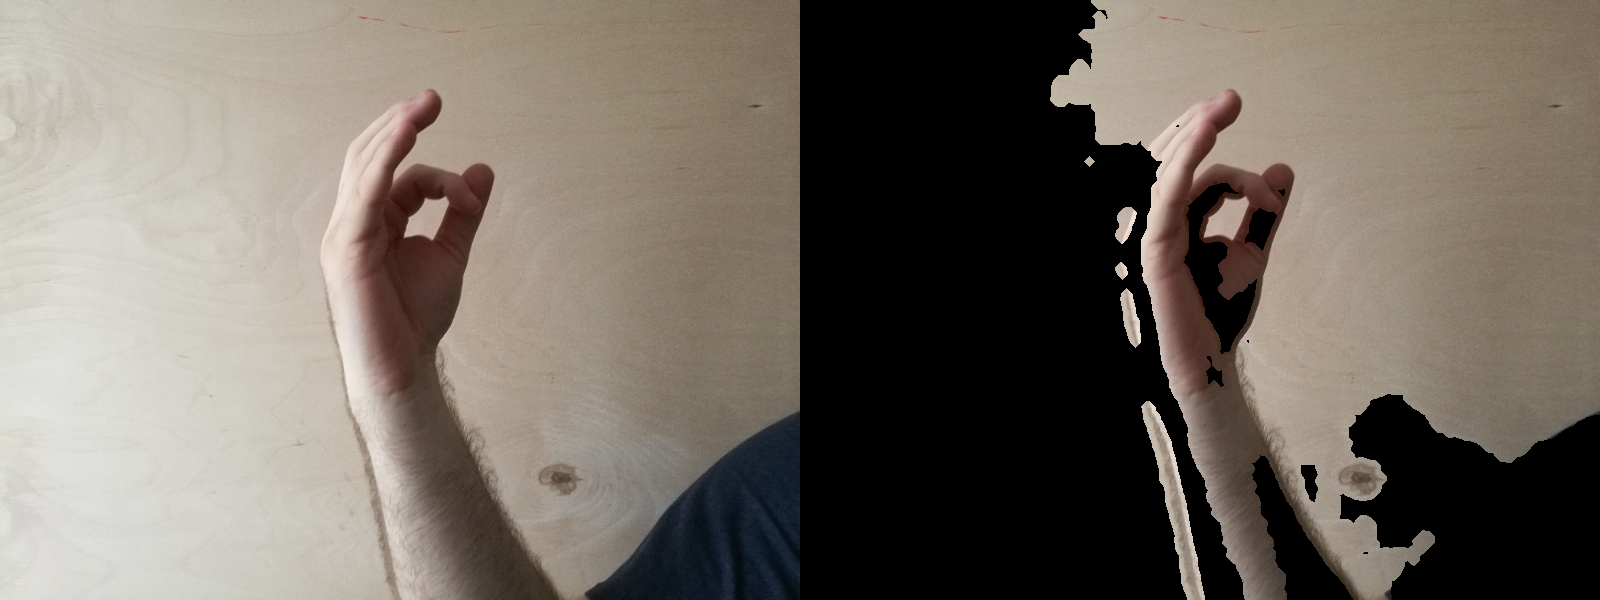

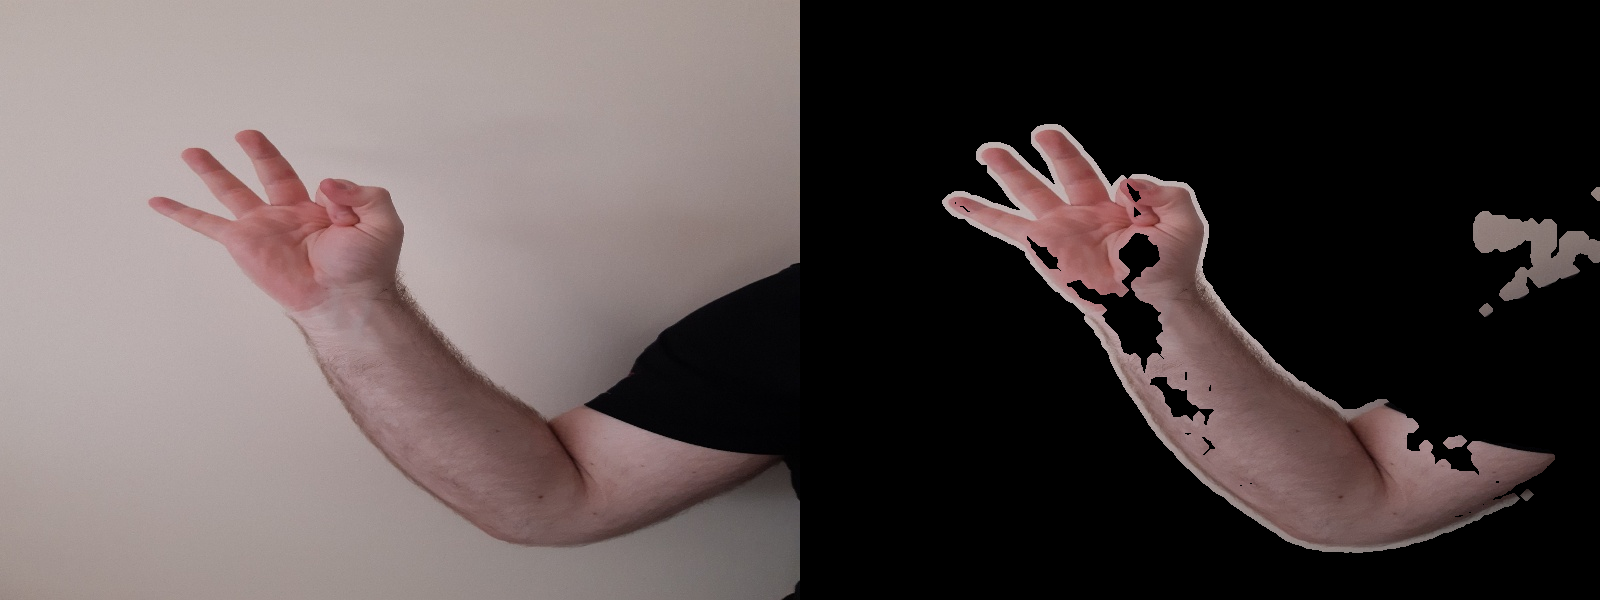

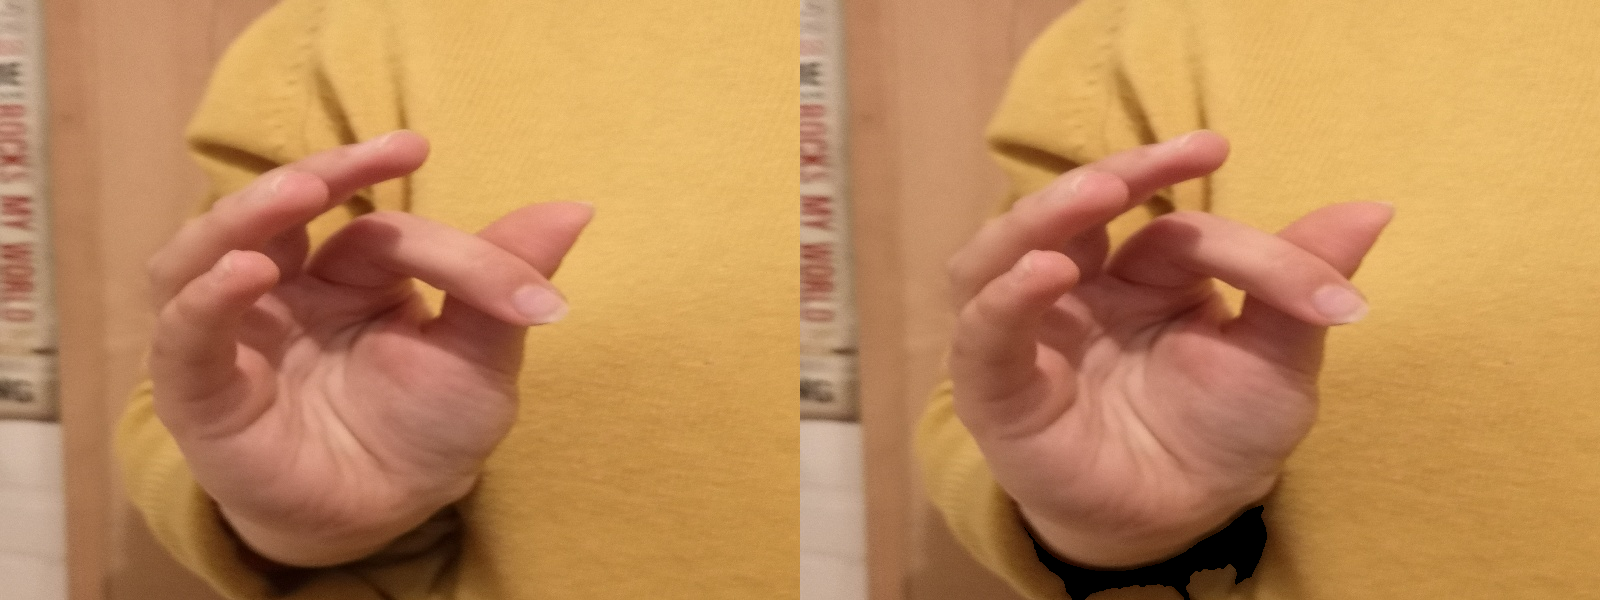

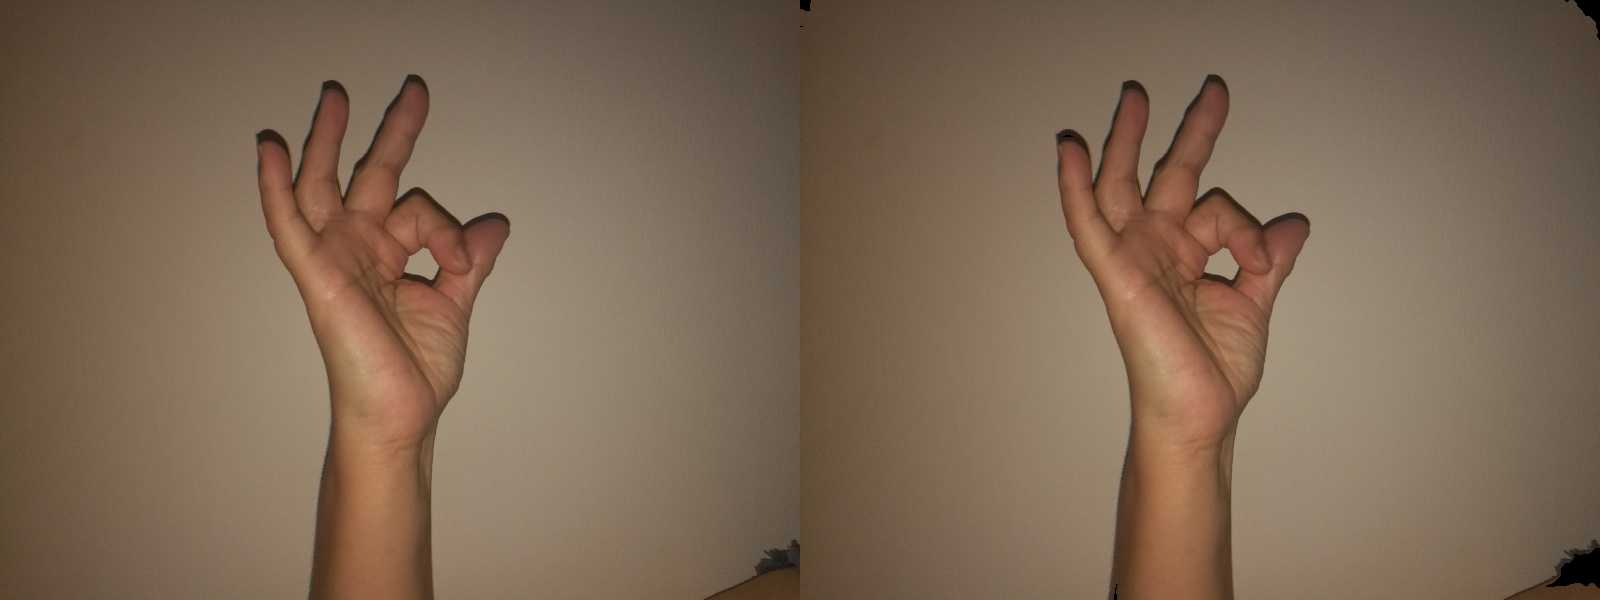

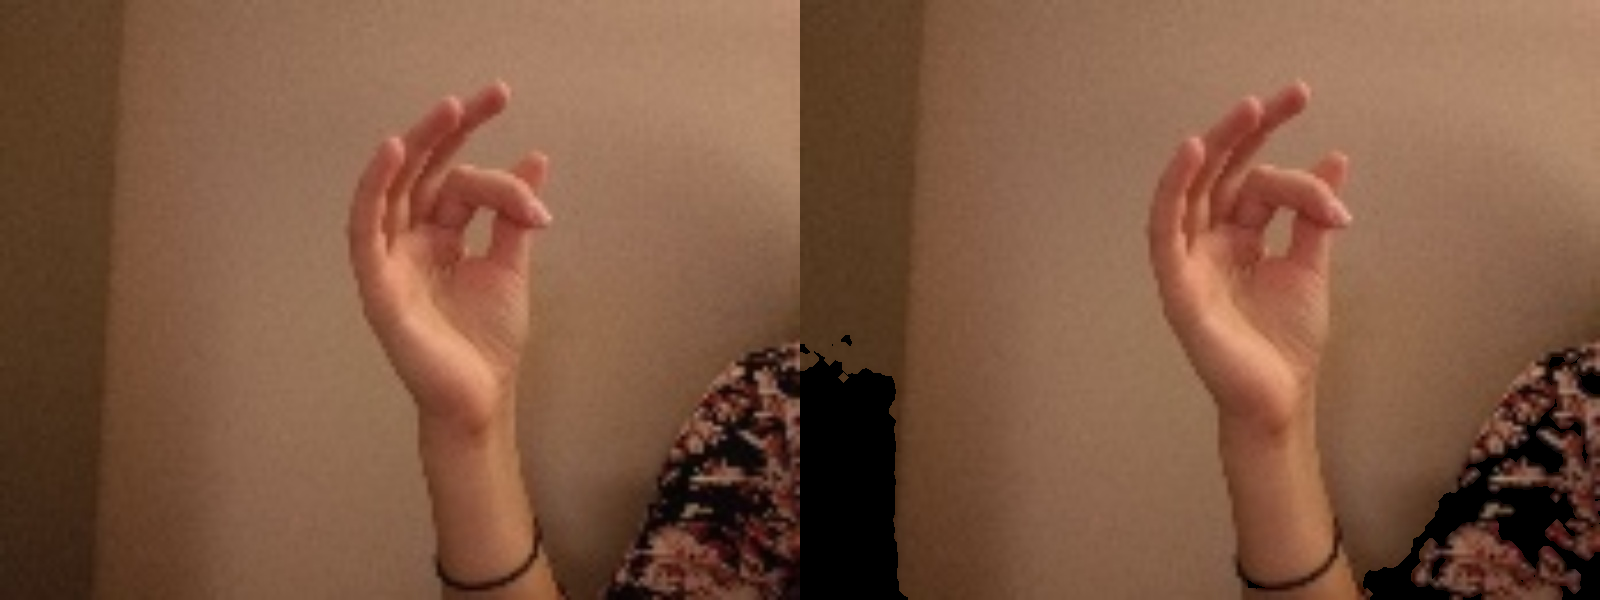

In [147]:
images = glob((f'{test_path}/*'))

for path in images:
    image = cv2.imread(path)
    converted = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    skinMask = cv2.inRange(converted, lower, upper)
    skinMask = cv2.GaussianBlur(skinMask, (11, 11), 0)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    skinMask = cv2.erode(skinMask, kernel, iterations = 5)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 5)

    skin = cv2.bitwise_and(image, image, mask = skinMask)

    cv2_imshow(np.hstack([image, skin]))